In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
#df = pd.read_csv("/content/HousingData.csv")
df = pd.read_csv('/Users/lana-n/datacsv/AirPassengers.csv',skipfooter=5)
df

<ipython-input-2-d29d9b864300>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('/Users/lana-n/datacsv/AirPassengers.csv',skipfooter=5)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535


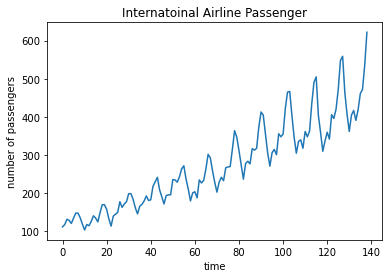

In [3]:
dataset = df.iloc[:,1].values
plt.plot(dataset)
plt.xlabel('time')
plt.ylabel('number of passengers')
plt.title('Internatoinal Airline Passenger')
plt.show()

In [4]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype('float32')
dataset.shape

(139, 1)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [6]:
train_size = int(len(dataset)*0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print('train_size : {}, test_size : {}'.format(len(train),len(test)))

train_size : 69, test_size : 70


In [7]:
timestamp=10
dataX = []
dataY = []
for i in range(len(train)-timestamp-1):
    a = train[i:(i+timestamp),0]
    dataX.append(a)
    dataY.append(train[i+timestamp,0])
trainX = np.array(dataX)
trainY = np.array(dataY)

In [8]:
timestep=10
dataX = []
dataY = []
for i in range(len(test)-timestamp-1):
    a = test[i:(i+timestamp),0]
    dataX.append(a)
    dataY.append(test[i+timestamp,0])
testX = np.array(dataX)
testY = np.array(dataY)

In [9]:
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [10]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, timestamp))) # 10 lstm neuron(block)
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                840       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
58/58 [==============================] - 1s 1ms/step - loss: 0.0315
Epoch 2/50
58/58 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 3/50
58/58 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 4/50
58/58 [==============================] - 0s 965us/step - loss: 0.0050
Epoch 5/50
58/58 [==============================] - 0s 962us/step - loss: 0.0046
Epoch 6/50
58/58 [==============================] - 0s 934us/step - loss: 0.0042
Epoch 7/50
58/58 [==============================] - 0s 940us/step - loss: 0.0039
Epoch 8/50
58/58 [==============================] - 0s 941us/step - loss: 0.0037
Epoch 9/50
58/58 [==============================] - 0s 919us/step - loss: 0.0035
Epoch 10/50
58/58 [==============================] - 0s 922us/step - loss: 0.0032
Epoch 11/50
58/58 [==============================] - 0s 916us/step - loss: 0.0031
Epoch 12/50
58/58 [==============================] - 0s 905us/step - loss: 0.0031
Epoch 13/50
58/58 [============

In [13]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 1ms/step
Train Score: 18.23 RMSE
Test Score: 47.29 RMSE


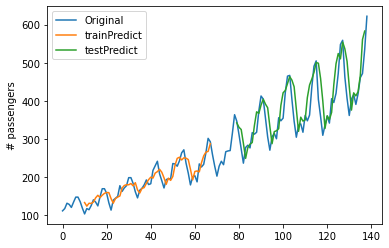

In [14]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[timestamp:len(trainPredict)+timestamp, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(timestamp*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset), label='Original')
plt.plot(trainPredictPlot, label='trainPredict')
plt.plot(testPredictPlot, label='testPredict')
plt.ylabel('# passengers')
plt.legend()
plt.show()